In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
df=pd.read_csv("spam.csv", encoding="windows-1252")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3524,ham,I not free today i haf 2 pick my parents up to...,NaN,NaN,NaN
3873,ham,No. Did you multimedia message them or e-mail?,NaN,NaN,NaN
2965,ham,"Are you being good, baby? :)",NaN,NaN,NaN
1523,ham,Yup ok thanx...,NaN,NaN,NaN
4347,ham,You give us back my id proof and &lt;#&gt; r...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# droping last 3 columns

In [7]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()
#  0 ham
#  1 spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check duplicate
df.duplicated().sum()

np.int64(403)

In [15]:
df=df.drop_duplicates(keep='first') 

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

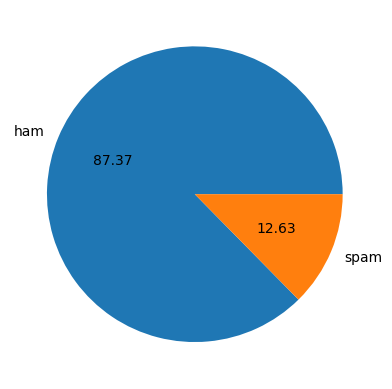

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [20]:
# data is imbalanced

In [21]:
import re

def count_words(text):
    return len(re.findall(r'\b\w+\b', text))

df['num_words'] = df['text'].apply(count_words)


In [22]:
df['num_characters'] = df['text'].apply(len)


In [23]:
df

,target,text,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,33,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",14,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,33,161
5568,0,Will Ì_ b going to esplanade fr home?,8,37
5569,0,"Pity, * was in mood for that. So...any other s...",10,57
5570,0,The guy did some bitching but I acted like i'd...,27,125


In [24]:

def count_sentences(text):
    # Split on sentence-ending punctuation followed by a space or end of string
    sentences = re.split(r'[.!?]+(?=\s|$)', text)
    # Filter out empty strings caused by trailing punctuation
    sentences = [s for s in sentences if s.strip()]
    return len(sentences)

df['num_sentences'] = df['text'].apply(count_sentences)


In [25]:
df


,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",20,111,3
1,0,Ok lar... Joking wif u oni...,6,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,33,155,2
3,0,U dun say so early hor... U c already then say...,11,49,2
4,0,"Nah I don't think he goes to usf, he lives aro...",14,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,33,161,5
5568,0,Will Ì_ b going to esplanade fr home?,8,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",10,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [26]:
df[['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,15.989940,78.977945,2.060747
std,11.518372,58.236293,1.442320
min,0.000000,2.000000,1.000000
25%,8.000000,36.000000,1.000000
50%,12.000000,60.000000,2.000000
75%,23.000000,117.000000,3.000000
max,190.000000,910.000000,31.000000


In [27]:
#  ham
df[df['target']==0][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,14.600974,70.459256,1.916962
std,11.448193,56.358207,1.364464
min,0.000000,2.000000,1.000000
25%,7.000000,34.000000,1.000000
50%,11.000000,52.000000,1.000000
75%,19.000000,90.000000,2.000000
max,190.000000,910.000000,31.000000


In [28]:
# spam
df[df['target']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,25.595712,137.891271,3.055130
std,6.185684,30.137753,1.569463
min,2.000000,13.000000,1.000000
25%,24.000000,132.000000,2.000000
50%,27.000000,149.000000,3.000000
75%,29.000000,157.000000,4.000000
max,40.000000,224.000000,9.000000


In [29]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

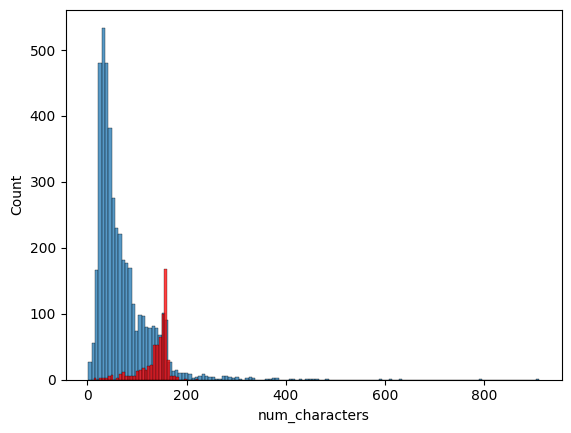

In [30]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

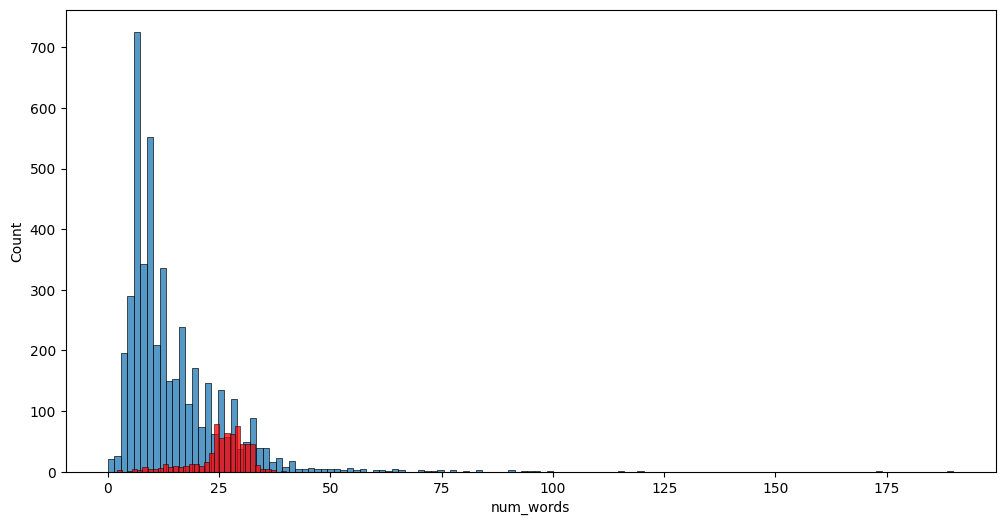

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

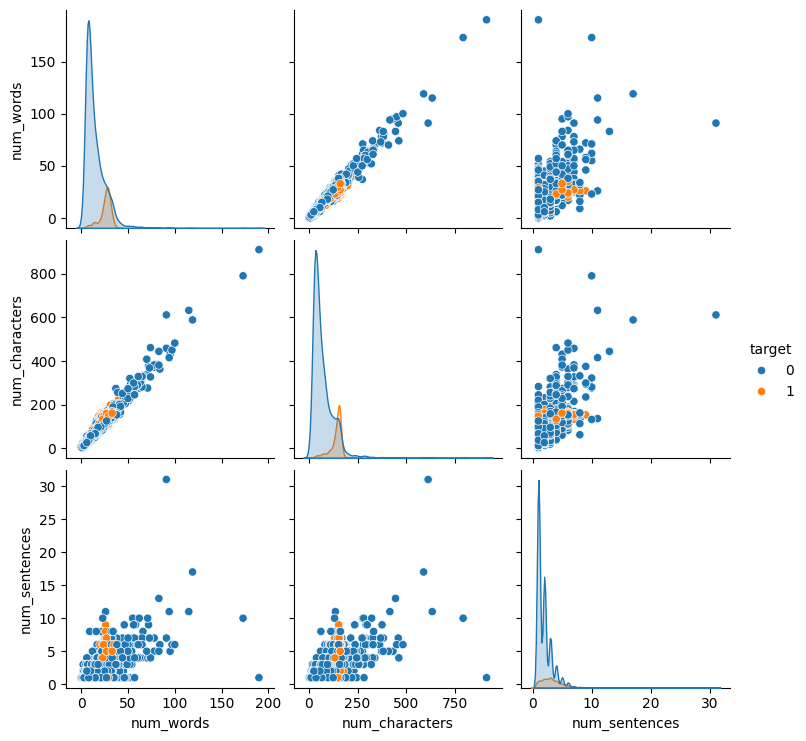

In [32]:
sns.pairplot(df,hue='target')


# 3. Data Preprocessing
. Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [33]:
from nltk.corpus import stopwords
import string
from string import punctuation  
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
def transform_text(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)


In [36]:
df.head()


,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,33,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,49,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",14,61,1,nah think goe usf live around though


In [37]:
! pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
#  spam

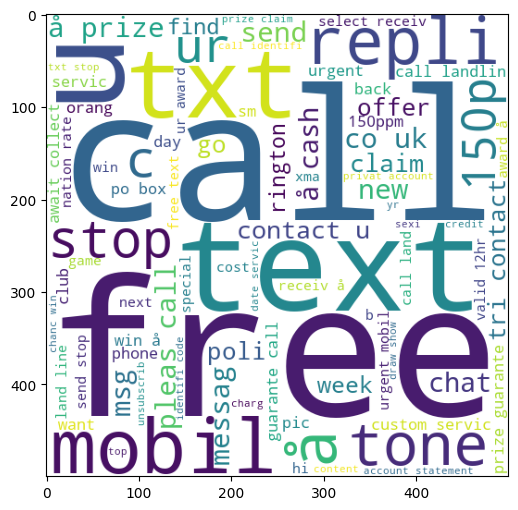

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


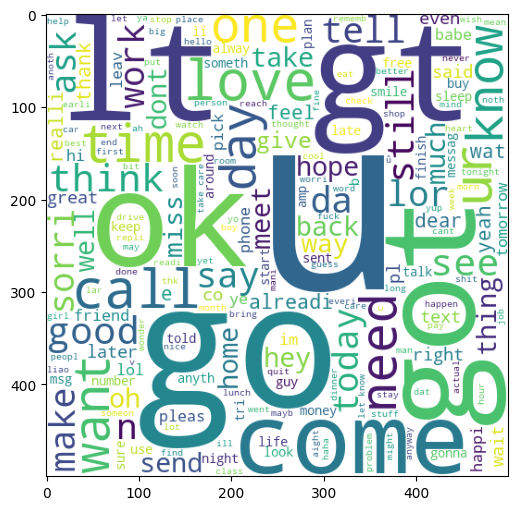

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
df.head(1)

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,3,go jurong point crazi avail bugi n great world...


In [43]:
spam_corpus = []
# for getting top words used in spam messages (frequently)
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
ham_corpus = []
# for getting top words used in ham messages (frequently)
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(spam_corpus)

11993

In [51]:
from collections import Counter

In [52]:
top_30_spam= Counter(ham_corpus).most_common(30)
top_30_spamdf = pd.DataFrame(top_30_spam, columns=['word', 'count'])


In [53]:
top_30_spamdf

,word,count
0,u,915
1,go,405
2,get,354
3,2,302
4,gt,288
5,lt,287
6,come,276
7,ok,255
8,call,240
9,like,236


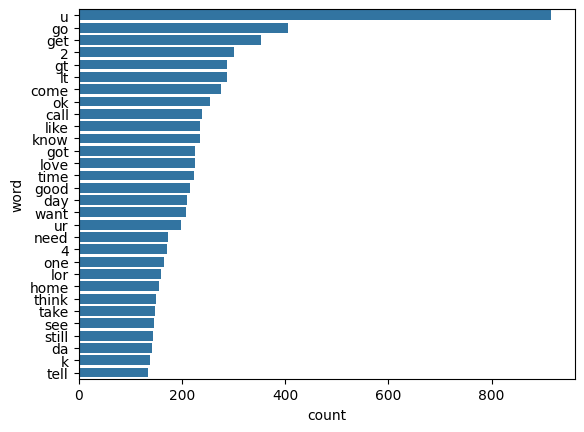

In [54]:
from collections import Counter
sns.barplot(x='count', y='word', data=top_30_spamdf)
plt.show()

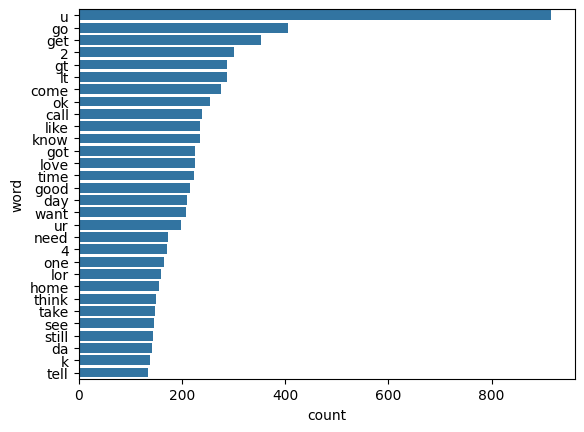

In [62]:
sns.barplot(x='count', y='word', data=top_30_spamdf)
plt.show()

# Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [65]:
X.shape
# // 5169 messages 3000 words

(5169, 3000)

In [66]:
y = df['target'].values


In [67]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[791 105]
 [ 20 118]]
0.5291479820627802


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[895   1]
 [ 12 126]]
0.9921259842519685


In [73]:
# tfidf --> MNB

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [87]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [88]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [89]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [90]:
# performance_df

In [91]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [92]:
# performance_df1

In [93]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [94]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['text'])
y = df['target']

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [97]:
import pickle

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)